# Debugging Concussions

In [1]:
from QuantitativeCleaner import *
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [9]:
df_full = pd.read_parquet("F:/Data/Processing_data/OpponentPlays.parquet")

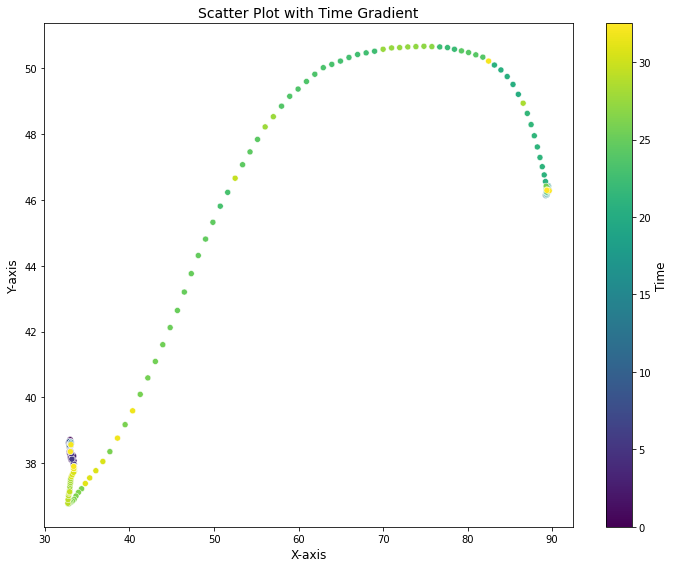

In [10]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt


df = df_full[df_full['PlayKey'] == "31023-29-538"]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Create the scatter plot
scatter = sns.scatterplot(data=df, x='x', y='y', hue='time', palette='viridis', ax=ax)

# Remove the legend created by seaborn
scatter.legend_.remove()

# Add a color bar
norm = plt.Normalize(df['time'].min(), df['time'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Time', fontsize=12)

# Set labels and title
ax.set_xlabel('X-axis', fontsize=12)
ax.set_ylabel('Y-axis', fontsize=12)
ax.set_title('Scatter Plot with Time Gradient', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()



## Start debugging
The tables start as csv files that are already chunked by part of season and year. 

In [12]:
import pandas as pd
df_orig = pd.read_csv("F:/Data/NFL-Punt-Analytics-Competition/NGS-2017-post.csv")
df = df_orig.copy()


In [13]:
df['PlayKey'] = (
    df['GSISID'].astype(str) + '-' + 
    df['GameKey'].astype(str) + '-' + 
    df['PlayID'].astype(str)
)

df.head()

,Season_Year,GameKey,PlayID,GSISID,Time,x,y,dis,o,dir,Event,PlayKey
0,2017,665,1094,31940,2018-02-05 00:15:33.700,86.949997,31.740000,0.18,48.070000,204.600006,NaN,31940-665-1094
1,2017,665,1094,28237,2018-02-05 00:15:33.900,79.760002,41.180000,0.16,5.320000,113.519997,NaN,28237-665-1094
2,2017,665,1094,26293,2018-02-05 00:15:34.000,86.099998,28.520000,0.04,358.850006,117.839996,NaN,26293-665-1094
3,2017,665,1094,29239,2018-02-05 00:15:34.000,87.760002,28.700001,0.01,322.109985,293.480011,NaN,29239-665-1094
4,2017,665,1094,30288,2018-02-05 00:15:34.000,88.470001,33.520000,0.05,22.889999,126.959999,NaN,30288-665-1094


In [14]:
# Filter the DataFrame
df.sort_values(['PlayKey', 'Time'], inplace=True)

In [15]:
df.head(30)

,Season_Year,GameKey,PlayID,GSISID,Time,x,y,dis,o,dir,Event,PlayKey
690134,2017,660,1488,19596,2018-01-14 02:23:26.800,74.300003,-0.96,0.10,292.500000,35.150002,NaN,19596-660-1488
690138,2017,660,1488,19596,2018-01-14 02:23:26.900,74.360001,-0.87,0.10,292.980011,35.730000,NaN,19596-660-1488
690142,2017,660,1488,19596,2018-01-14 02:23:27.000,74.400002,-0.79,0.10,293.649994,36.270000,NaN,19596-660-1488
690146,2017,660,1488,19596,2018-01-14 02:23:27.100,74.449997,-0.70,0.10,294.559998,37.410000,NaN,19596-660-1488
690150,2017,660,1488,19596,2018-01-14 02:23:27.200,74.500000,-0.62,0.10,296.230011,38.759998,NaN,19596-660-1488
690154,2017,660,1488,19596,2018-01-14 02:23:27.300,74.570000,-0.54,0.10,298.250000,40.160000,NaN,19596-660-1488
698446,2017,660,1488,19596,2018-01-14 02:23:27.400,74.629997,-0.45,0.11,300.290008,40.570000,NaN,19596-660-1488
698733,2017,660,1488,19596,2018-01-14 02:23:27.500,74.699997,-0.38,0.10,302.369995,42.389999,NaN,19596-660-1488
699136,2017,660,1488,19596,2018-01-14 02:23:27.600,74.769997,-0.31,0.10,304.450012,43.380001,NaN,19596-660-1488
699261,2017,660,1488,19596,2018-01-14 02:23:27.700,74.820000,-0.23,0.09,306.570007,45.270000,NaN,19596-660-1488


In [20]:
# Filter the DataFrame
df = df[(df['PlayKey'] == "19596-660-1488")]

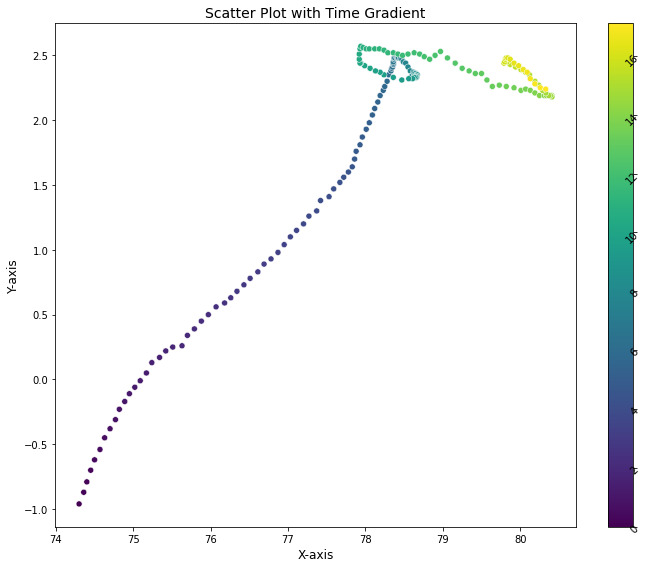

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming df is your pandas DataFrame

# Convert 'Time' to datetime if it's not already
df['Time'] = pd.to_datetime(df['Time'])

# Create a numeric representation of time (seconds since the earliest time)
df['Time_numeric'] = (df['Time'] - df['Time'].min()).dt.total_seconds()

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Create the scatter plot
scatter = sns.scatterplot(data=df, x='x', y='y', hue='Time_numeric', palette='viridis', ax=ax)

# Remove the legend if it exists
if hasattr(scatter, 'legend_') and scatter.legend_ is not None:
    scatter.legend_.remove()

# Add a color bar
norm = plt.Normalize(df['Time_numeric'].min(), df['Time_numeric'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)

# # Format the colorbar ticks to show actual dates
# cbar.set_label('Time', fontsize=12)
# cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: (df['Time'].min() + pd.Timedelta(seconds=x)).strftime('%Y-%m-%d %H:%M:%S')))

# Set labels and title
ax.set_xlabel('X-axis', fontsize=12)
ax.set_ylabel('Y-axis', fontsize=12)
ax.set_title('Scatter Plot with Time Gradient', fontsize=14)

# Rotate colorbar tick labels for better readability
plt.setp(cbar.ax.get_yticklabels(), rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [20]:

df = df_orig.with_columns([
    pl.concat_str([
        pl.col('GSISID').cast(pl.Int32).cast(pl.Utf8)
        , pl.lit('-')
        , pl.col('GameKey').cast(pl.Utf8)
        , pl.lit('-')
        , pl.col('PlayID').cast(pl.Utf8)
    ]).alias('PlayKey')
])
df.head()

Season_Year,GameKey,PlayID,GSISID,Time,x,y,dis,o,dir,Event,PlayKey
i64,i64,i64,i64,str,f64,f64,f64,f64,f64,str,str
2017,665,1094,31940,"""2018-02-05 00:15:33.700""",86.949997,31.74,0.18,48.07,204.600006,null,"""31940-665-1094"""
2017,665,1094,28237,"""2018-02-05 00:15:33.900""",79.760002,41.18,0.16,5.32,113.519997,null,"""28237-665-1094"""
2017,665,1094,26293,"""2018-02-05 00:15:34.000""",86.099998,28.52,0.04,358.850006,117.839996,null,"""26293-665-1094"""
2017,665,1094,29239,"""2018-02-05 00:15:34.000""",87.760002,28.700001,0.01,322.109985,293.480011,null,"""29239-665-1094"""
2017,665,1094,30288,"""2018-02-05 00:15:34.000""",88.470001,33.52,0.05,22.889999,126.959999,null,"""30288-665-1094"""


There is a difference in the Injury Set and the Concussion set in the Time parameter. Time is recorded as datetime for the concussions set, but listed as 0 to end time in 0.1 s increments in the Injury table. 

I programmatically assinged the numbers to this table, and I'm thinking that what may have happened was that the sort was performed by something other than the actual Time column and the playkey. This could introduce the weird chunks. 

The first function is column_corrector, which is most likely the problem. 

In [21]:
df = df.select([
    'PlayKey'
    , 'Time'
    , 'x'
    , 'y'
    , 'o'
    , 'dir'
    , 'GSISID'
    ])

df.head()

PlayKey,Time,x,y,o,dir,GSISID
str,str,f64,f64,f64,f64,i64
"""31940-665-1094""","""2018-02-05 00:15:33.700""",86.949997,31.74,48.07,204.600006,31940
"""28237-665-1094""","""2018-02-05 00:15:33.900""",79.760002,41.18,5.32,113.519997,28237
"""26293-665-1094""","""2018-02-05 00:15:34.000""",86.099998,28.52,358.850006,117.839996,26293
"""29239-665-1094""","""2018-02-05 00:15:34.000""",87.760002,28.700001,322.109985,293.480011,29239
"""30288-665-1094""","""2018-02-05 00:15:34.000""",88.470001,33.52,22.889999,126.959999,30288


In [22]:
df = df.sort(['Time', 'PlayKey'])

In [23]:
df.head(10)

PlayKey,Time,x,y,o,dir,GSISID
str,str,f64,f64,f64,f64,i64
"""23534-655-219""","""2018-01-06 21:40:38.200""",96.480003,23.15,192.929993,266.549988,23534
"""24535-655-219""","""2018-01-06 21:40:38.200""",73.449997,31.48,57.400002,124.050003,24535
"""26935-655-219""","""2018-01-06 21:40:38.200""",80.260002,41.970001,39.060001,138.809998,26935
"""27442-655-219""","""2018-01-06 21:40:38.200""",82.860001,25.719999,170.729996,19.73,27442
"""28038-655-219""","""2018-01-06 21:40:38.200""",64.339996,54.240002,69.730003,256.519989,28038
"""28074-655-219""","""2018-01-06 21:40:38.200""",84.970001,20.940001,203.339996,300.98999,28074
"""28987-655-219""","""2018-01-06 21:40:38.200""",79.93,25.58,33.799999,256.75,28987
"""29794-655-219""","""2018-01-06 21:40:38.200""",80.199997,22.530001,301.640015,116.209999,29794
"""30020-655-219""","""2018-01-06 21:40:38.200""",77.339996,28.379999,4.97,147.910004,30020


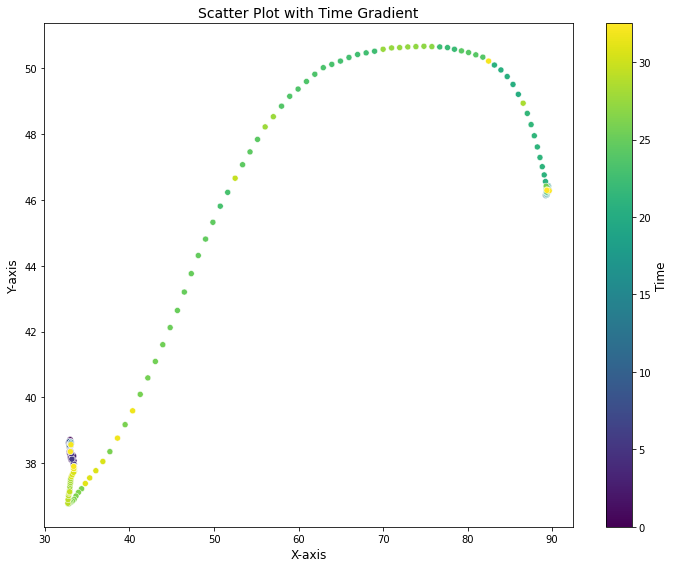

In [28]:
df = df_full[df_full['PlayKey'] == "31023-29-538"]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Create the scatter plot
scatter = sns.scatterplot(data=df, x='x', y='y', hue='time', palette='viridis', ax=ax)

# Remove the legend created by seaborn
scatter.legend_.remove()

# Add a color bar
norm = plt.Normalize(df['time'].min(), df['time'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Time', fontsize=12)

# Set labels and title
ax.set_xlabel('X-axis', fontsize=12)
ax.set_ylabel('Y-axis', fontsize=12)
ax.set_title('Scatter Plot with Time Gradient', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()
